# Пример понижения размерности с помощью PCA

In [1]:
import numpy as np

In [2]:
train = np.loadtxt('../002/data/digit/train.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.reshape(train[:, 1:], (len(train[:, 1:]), 28, 28))

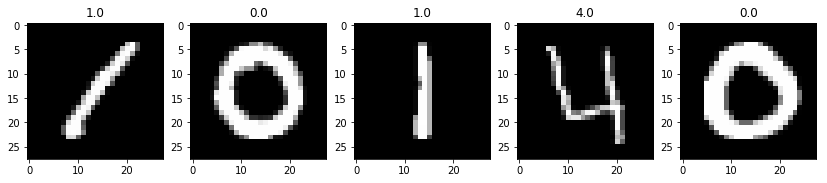

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [110]:
X = train_img[np.random.choice(train_img.shape[0], 10000)].reshape(-1, 28 * 28).astype(np.float32)

In [111]:
# центрируем данные
mean = X.mean(axis=0)
X -= mean

In [112]:
# матрица ковариации признаков
cov = np.dot(X.T, X) / X.shape[0]

In [113]:
U,S,_ = np.linalg.svd(cov)
# U - собсвенные вектора матрицы ковариации
# S - собственные значения

## Собственные числа

In [ ]:
for i in range(5):
    print('[%03d] %.3f' % (i + 1, np.sum(S[0:i + 1])/ np.sum(S)))

In [ ]:
plt.plot([np.sum(S[0:i + 1])/ np.sum(S) for i in range(S.shape[0])])

## Понижам размерность

In [153]:
n_comp = 2
Xrot_reduced = np.dot(X, U[:,:n_comp])

## Восстанавливаем изображение после понижения размерности

In [156]:
Xrot_restored = np.dot(Xrot_reduced, U[:,:n_comp].T)

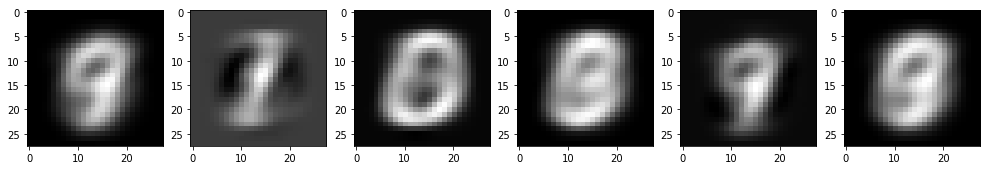

In [157]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(Xrot_restored[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    img += mean
    plt.imshow(img.reshape((28,28)), cmap='gray');

## Визуализация собственных векторов

In [158]:
# TODO